### **ASYMMETRY OF INFORMATION IN FINANCIAL MARKETS**

*Asymmetric information* is a term that refers to when one party in a transaction is in possession of more information than the other. Financial markets exhibit asymmetric information in any transaction in which one of the two parties involved has more information than the other and thus has the ability to make a more informed decision. Economists believe that such asymmetry can lead to market failure.
\begin{equation}\end{equation}
We consider a multi-period repeated game model involving two agents who trade shares of a certain company. The trade of shares here is assumed to be between the two agents, where one agent is an *insider*, who has private 
information about the price movement of the share while the other doesn't have access to information of any such kind. Consequently, the situation under consideration presents an asymmetric information problem.

\begin{equation}\end{equation}

Like in many other asymmetric information problems, the situation presented here usually favours the agent who has access to information which is unavailable to the other agent. The insider makes use of the 
information available to improve his/her outcome whereas the only source of information that is avalable to the other agent is the actions of the insider itself.

\begin{equation}\end{equation}

We explore various scenarios under this model where objective of each agent is as described below:
* Agent 1 (with private information): maintain a delicate balance between taking advantage of his private information and concealing it from the other agent.
* Agent 2: learn from agent 1's actions in the past to make reasonable assumptions about the share price movements for the future trades.

## Importance of Multi-Period Model

A multi-period model must be taken into consideration in order to analyse how the information asymmetry influences the results of agents trading in a financial market with risk and volatility.

By examining the multi-period model,
we can draw conclusions about the market outcomes based on the behaviour of both informed and less-informed agents. 

The response of an agent (either informed or not) to the current share price
depends on all of the prior prices and the behaviours of the participating agents. *Insiders* are not interested in the immediate disclosure of their private information and thus compels them to randomize
their actions which results in the oscillatory behaviour of price evolution.As a result, the scenario under examination here necessitates a multi-period repeated game approach.

## Model Desription:
* Each player starts with a certain amount of money and shares.
* Each step of the repeated game involves simultaneous bidding by both the players/agents for a single share.
* The player with the highest bid receives the share at the bid price while the other player is paid the respective sum.
* The objective of each player is to maximise the value of their portfolio, i.e., money plus liquidation value of obtained
shares.
* The value of the share at each step of the game is assumed to follow a normal distribution of mean=50 units and standard deviation=10 units (tunable parameter of the model).
* Player 1 has complete access to this share price(sp) at each step of the game.
* Since player1 is not interested in revealing the share price information via his actions, he choses to bid with a samll random error,e that varies in the range of -1 to 1.
* For now, player 2's strategy is to randomly bid a value between 0 and 100 (uniform distribution).
* Other scenarios where player 2 updates his strategy in based on the prior moves/bids of player 1 will also be analysed in our model.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def share_price(mu=50,sigma=10):        #sigma is a way of setting the volatality of a share
  share_price=np.round(np.random.normal(mu,sigma),2)
  if share_price>=100:
    return 100.00
  elif share_price<0:
    return 0.00
  return np.round(np.random.normal(mu,sigma),2)

def P1_strategy(known_price):
  strategic_error=1
  x=np.round(np.random.uniform(known_price-strategic_error,known_price+strategic_error),2)
  if x<0:
    return 0.00
  return x

def P2_naive_strategy(guess=100):
  return np.round(np.random.uniform(0,guess),2)

In [ ]:
def plot(p1,p2):

  fig=plt.figure()
  ax1=fig.subplots()
  ax2=ax1.twinx()
  game_period=len(p1)
  x=range(1,game_period+1)
  ax1.plot(x,p1,"red")
  ax2.plot(x,p2,"blue")
  ax1.set_xlabel("Iteration")
  ax1.set_ylabel("P1_portfolio",color="red")
  ax2.set_ylabel("P2_portfolio",color="blue")
  plt.show()

def game1(P1_money=1000,P2_money=1000,P1_share=10,P2_share=10,game_period=100):
  P1_portfolio_values=[]
  P2_portfolio_values=[]
  flag=0

  for step in range(game_period):
    current_share_price= share_price()
    P1_bid=P1_strategy(current_share_price)
    P2_bid=P2_naive_strategy()
    
    if P1_bid>P2_bid:
      P1_share+=1
      P2_share-=1
      P1_money-=(P1_bid)
      P2_money+=(P1_bid)
      
    elif P2_bid>P1_bid:
      P2_share+=1
      P1_share-=1
      P2_money-=(P2_bid)
      P1_money+=(P2_bid)
    
    if P1_share<0 or P2_share<0:
      flag=1
      break
    
    P1_portfolio= P1_money + (P1_share)*(current_share_price)
    P2_portfolio= P2_money + (P2_share)*(current_share_price)

    P1_portfolio_values.append(P1_portfolio)
    P2_portfolio_values.append(P2_portfolio)
  
  if flag==1:
    return P1_portfolio_values,P2_portfolio_values

  return P1_portfolio_values,P2_portfolio_values

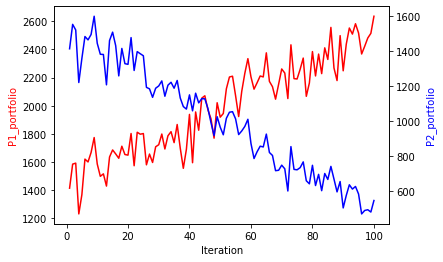

In [ ]:
P1_port,P2_port=game1()
plot(P1_port,P2_port)

In [ ]:
def game_statistics(game):
  p1_win_count=0
  p2_win_count=0
  diff=[]
  for i in range(500):
    P1,P2=game()
    p1_final=P1[-1]
    p2_final=P2[-1]
    if p1_final>p2_final:
      p1_win_count+=1
      diff.append(p1_final-p2_final)
    else:
      p2_win_count+=1
      diff.append(p2_final-p1_final)
  print("---------------------------------------------")
  print("Game Statistics(out of 500)")
  print("P1_count:" , p1_win_count)
  print("P2_count:", p2_win_count)
  print("Mean difference in Portfolio values: ", np.round(np.mean(diff),2))
  print("P1 win % :", np.round(p1_win_count/5,2))
  print("P2 win % :", np.round(p2_win_count/5,2))
  print("----------------------------------------------")

game_statistics(game1)

---------------------------------------------
Game Statistics(out of 500)
P1_count: 499
P2_count: 1
Mean difference in Portfolio values:  2554.07
P1 win % : 99.8
P2 win % : 0.2
----------------------------------------------


In [ ]:
#Bayesian inference
def player2_learning(a,b,player1_moves,scaling=0.01):
  updated_a = a+ player1_moves[-1]*0.01
  updated_b = b+ 1-player1_moves[-1]*0.01
  return updated_a,updated_b

def player2_belief_strategy(a,b,scaling=0.01):
  x=np.random.beta(a,b)
  player2_bid= x*(1/scaling)
  return player2_bid

def game2(P1_money=1000,P2_money=1000,P1_share=10,P2_share=10,game_period=100):
  P1_portfolio_values=[]
  P2_portfolio_values=[]
  P1_moves=[]
  a=1
  b=1
  for step in range(game_period):
    current_share_price= share_price()
    P1_bid=P1_strategy(current_share_price)
    P1_moves.append(P1_bid)
    P2_bid=player2_belief_strategy(a,b)
    
    if P1_bid>P2_bid:
      P1_share+=1
      P2_share-=1
      P1_money-=(P1_bid)
      P2_money+=(P1_bid)
      
    elif P2_bid>P1_bid:
      P2_share+=1
      P1_share-=1
      P2_money-=(P2_bid)
      P1_money+=(P2_bid)
      
    P1_portfolio= P1_money + (P1_share)*(current_share_price)
    P2_portfolio= P2_money + (P2_share)*(current_share_price)

    P1_portfolio_values.append(P1_portfolio)
    P2_portfolio_values.append(P2_portfolio)
    
    a,b=player2_learning(a,b,np.array(P1_moves))
  return P1_portfolio_values,P2_portfolio_values

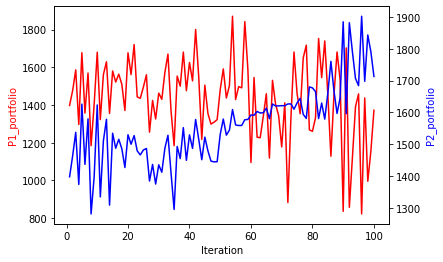

In [ ]:
P1_port,P2_port=game2()
plot(P1_port,P2_port)

In [ ]:
game_statistics(game2)

---------------------------------------------
Game Statistics(out of 500)
P1_count: 137
P2_count: 363
Mean difference in Portfolio values:  211.27
P1 win % : 27.4
P2 win % : 72.6
----------------------------------------------


In [ ]:
#Moving Average
def player2_MA_strategy(player1_moves,interval=5,guess=100):
  if len(player1_moves)<5:
    return np.round(np.random.uniform(0,guess),2)
  else:
    p2_bid=np.sum(player1_moves[-1*interval: ])/interval
    return p2_bid

def game3(P1_money=1000,P2_money=1000,P1_share=10,P2_share=10,game_period=100):
  P1_portfolio_values=[]
  P2_portfolio_values=[]
  P1_moves=[]
  for step in range(game_period):
    current_share_price= share_price()
    P1_bid=P1_strategy(current_share_price)
    P2_bid=player2_MA_strategy(P1_moves)
    P1_moves.append(P1_bid)

    if P1_bid>P2_bid:
      P1_share+=1
      P2_share-=1
      P1_money-=(P1_bid)
      P2_money+=(P1_bid)
      
    elif P2_bid>P1_bid:
      P2_share+=1
      P1_share-=1
      P2_money-=(P2_bid)
      P1_money+=(P2_bid)
      
    P1_portfolio= P1_money + (P1_share)*(current_share_price)
    P2_portfolio= P2_money + (P2_share)*(current_share_price)

    P1_portfolio_values.append(P1_portfolio)
    P2_portfolio_values.append(P2_portfolio)

  
  return P1_portfolio_values,P2_portfolio_values

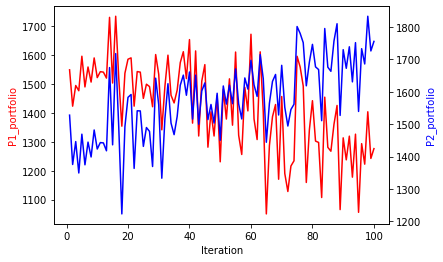

In [ ]:
P1_port,P2_port=game3()
plot(P1_port,P2_port)

In [ ]:
game_statistics(game3)

---------------------------------------------
Game Statistics(out of 500)
P1_count: 3
P2_count: 497
Mean difference in Portfolio values:  440.11
P1 win % : 0.6
P2 win % : 99.4
----------------------------------------------


In [ ]:
def game_statistics_regulated(game):
  p1_win_count=0
  p2_win_count=0
  diff=[]
  for i in range(500):
    P1,P2,P1_pen_count,P2_pen_count=game()
    p1_final=P1[-1]
    p2_final=P2[-1]
    if p1_final>p2_final:
      p1_win_count+=1
      diff.append(p1_final-p2_final)
    else:
      p2_win_count+=1
      diff.append(p2_final-p1_final)
  print("---------------------------------------------")
  print("Game Statistics(out of 500)")
  print("P1_count:" , p1_win_count)
  print("P2_count:", p2_win_count)
  print("Mean difference in Portfolio values: ", np.round(np.mean(diff),2))
  print("P1 win % :", np.round(p1_win_count/5,2))
  print("P2 win % :", np.round(p2_win_count/5,2))
  print("No. of times penalty levied on P1: ", P1_pen_count)
  print("No. of times penalty levied on P2: ", P2_pen_count)
  print("----------------------------------------------")

In [ ]:
#Regulators
def is_penalty_applicable(player_bids,share_price,window=3,threshold=0.4):
  if len(player_bids)<window:
    return False
  else:
    flag=0
    n=len(player_bids)
    for i in range(window):
      if abs(player_bids[n-i-1]-share_price[n-i-1])<=threshold:
        continue
      else:
        flag=1
        break
    if flag==0:
      return True
    else:
      return False

def penalty(player_port,window=3):
  window_profit=player_port[-1]-player_port[-1*window]
  return 3*(window_profit)


def game_with_penalty_SMA(P1_money=1000,P2_money=1000,P1_share=10,P2_share=10,game_period=100):
  P1_portfolio_values=[]
  P2_portfolio_values=[]
  P1_moves=[]
  P2_moves=[]
  share_prices=[]
  P1_pen_count=0
  P2_pen_count=0
  for step in range(game_period):
    current_share_price= share_price()
    share_prices.append(current_share_price)
    P1_bid=P1_strategy(current_share_price)
    P1_moves.append(P1_bid)
    P2_bid=player2_MA_strategy(P1_moves)
    P2_moves.append(P2_bid)

    if P1_bid>P2_bid:
      P1_share+=1
      P2_share-=1
      P1_money-=(P1_bid)
      P2_money+=(P1_bid)
      
    elif P2_bid>P1_bid:
      P2_share+=1
      P1_share-=1
      P2_money-=(P2_bid)
      P1_money+=(P2_bid)
  
    P1_portfolio= P1_money + (P1_share)*(current_share_price)
    P2_portfolio= P2_money + (P2_share)*(current_share_price)

    if is_penalty_applicable(P1_moves,share_prices):
      P1_portfolio-=penalty(P1_moves)
      P1_pen_count+=1
    if is_penalty_applicable(P2_moves,share_prices):
      P2_portfolio-=penalty(P2_moves)
      P2_pen_count+=1

    P1_portfolio_values.append(P1_portfolio)
    P2_portfolio_values.append(P2_portfolio)

  plt.plot(share_prices,"orange")
  plt.xlabel("Iteration")
  plt.ylabel("Share Price")
  return P1_portfolio_values,P2_portfolio_values,P1_pen_count,P2_pen_count

def game_with_penalty_Bayesian(P1_money=1000,P2_money=1000,P1_share=10,P2_share=10,game_period=100):
  P1_portfolio_values=[]
  P2_portfolio_values=[]
  P1_moves=[]
  P2_moves=[]
  share_prices=[]
  P1_pen_count=0
  P2_pen_count=0
  a=1
  b=1
  for step in range(game_period):
    current_share_price= share_price()
    share_prices.append(current_share_price)
    P1_bid=P1_strategy(current_share_price)
    P1_moves.append(P1_bid)
    P2_bid=player2_belief_strategy(a,b)
    P2_moves.append(P2_bid)

    if P1_bid>P2_bid:
      P1_share+=1
      P2_share-=1
      P1_money-=(P1_bid)
      P2_money+=(P1_bid)
      
    elif P2_bid>P1_bid:
      P2_share+=1
      P1_share-=1
      P2_money-=(P2_bid)
      P1_money+=(P2_bid)
  
    P1_portfolio= P1_money + (P1_share)*(current_share_price)
    P2_portfolio= P2_money + (P2_share)*(current_share_price)

    if is_penalty_applicable(P1_moves,share_prices):
      P1_portfolio-=penalty(P1_moves)
      P1_pen_count+=1
    if is_penalty_applicable(P2_moves,share_prices):
      P2_portfolio-=penalty(P2_moves)
      P2_pen_count+=1

    P1_portfolio_values.append(P1_portfolio)
    P2_portfolio_values.append(P2_portfolio)
    a,b=player2_learning(a,b,np.array(P1_moves))

  return P1_portfolio_values,P2_portfolio_values,P1_pen_count,P2_pen_count


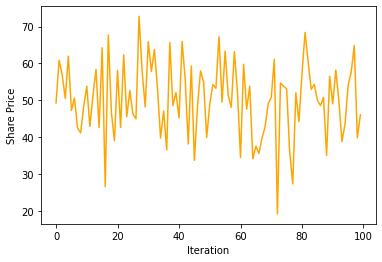

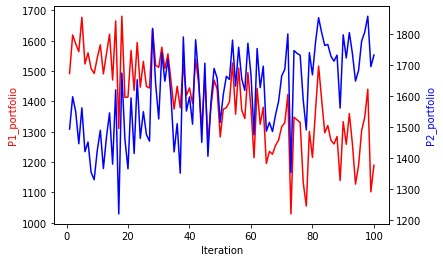

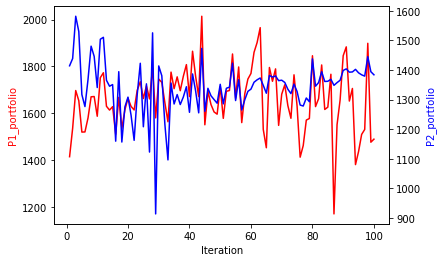

In [ ]:
P1_port,P2_port,P1_penalty_count,P2_penalty_count=game_with_penalty_SMA()
plot(P1_port,P2_port)
P1_port,P2_port,P1_penalty_count,P2_penalty_count=game_with_penalty_Bayesian()
plot(P1_port,P2_port)

In [ ]:
game_statistics_regulated(game_with_penalty_SMA)
game_statistics_regulated(game_with_penalty_Bayesian)

---------------------------------------------
Game Statistics(out of 500)
P1_count: 4
P2_count: 496
Mean difference in Portfolio values:  476.79
P1 win % : 0.8
P2 win % : 99.2
No. of times penalty levied on P1:  13
No. of times penalty levied on P2:  0
----------------------------------------------
---------------------------------------------
Game Statistics(out of 500)
P1_count: 153
P2_count: 347
Mean difference in Portfolio values:  226.56
P1 win % : 30.6
P2 win % : 69.4
No. of times penalty levied on P1:  3
No. of times penalty levied on P2:  0
----------------------------------------------
